# ch 8_8  pandas correlation
이번 시간에는 pandas dataframe에 내장된 corr 함수를 이용해서 서로 관련성이 높은 변수들을 살펴보겠습니다. 그전에 그 아래에 깔려있는 통계학 이론을 살펴보고 넘어가겠습니다.

## 모집단과 표본
모집단(population): 관심이 되는 대상 전체 (전체 유권자들의 투표 성향)  
표본(sample): 모집단의 특성을 알기 위해 추출한 일부 (전화로 여론조사를 한 1000명의 투표 성향)  
모집단의 특성을 알기 위해서 모든 사람들을 다 조사할 수 없으니, 표본을 추출하여 조사한다. 모집단이 특정한 분포를 이루고 있다고 가정하고, 표본을 통해 추출한 정보로 모집단의 특징을 추측하는 것을 모수 통계라고 부릅니다.

## 평균과 분산
### 평균
자료의 합을 자료의 개수로 나눠준 값. 모집단의 평균인지, 표본 집단의 평균인지에 따라서 표기 방법만 살짝 다르다. 헷갈린다면 표본 평균, 표본 분산 정도만 이해하고 넘어가도 무방하다.

모평균: 그리스어로 M을 나타내는 μ(뮤) 문자를 사용. N은 모집단의 수  

$$\mu=\frac{\sum_{i=1}^{n}{x_{i}}}{N}$$

표본 평균: X위에 바를 그린 기호로 표현. n은 표본의 크기

$$\bar{X}=\frac{\sum_{i=1}^{n}{x_{i}}}{n}$$

In [1]:
import numpy as np
marketing_cost = np.array([5,6,7,8,9,11,12,13,14,15])
sales = np.array([16,19,18,20,24,26,30,32,31,34])

In [2]:
marketing_cost.mean()

10.0

In [3]:
sales.mean()

25.0

In [12]:
import pandas as pd

In [27]:
df = pd.read_csv("./data/titanic_preprocessed_train.csv")

In [43]:
df = df.drop("PassengerId", axis=1)


### 분산, 표준편차
자료가 평균을 기준으로 얼만큼 퍼져있는지를 측정한 값. 모든 자료들이 평균으로부터 얼만큼 떨어졌는지 거리를 제곱한 것을 평균낸 것이 분산. 분산을 제곱근 한 것이 표준 편차. 

모분산: 모표준편차의 제곱으로 표현됨. 각 자료 값들에서 모평균을 빼준 값의 제곱합을 다시 평균낸 값.

$$\sigma^2=\frac{\sum_{i=1}^{N}({x_{i}-\mu)^2}}{N}$$

모표준편차: 그리스어 문자료 s를 나타내는 σ를 기호로 사용. 모분산의 제곱근

$$\sigma=\sqrt{\sigma^2}$$

표본 분산: 표본 표준편차의 제곱으로 표현. 표본의 수 n이 아닌, n-1로 나눠주는데 이는 통계학에서 부르는 자유도(degree of freedom)이라는 개념이다. 완벽히 이해하려면 매우 복잡한 개념으로 일단은 암기하고, 직관적으로는 각 표본들에서 표본 평균을 한번씩 빼준걸 개수에 반영시켜 준다는 의미로 받아들이면 된다.
$$s^2=\frac{\sum_{i=1}^{n}({x_{i}-\bar{x})^2}}{n-1}$$

표본 표준 편차: s로 표현
$$s=\sqrt{s^2}$$

In [29]:
marketing_cost.var()

11.0

In [30]:
marketing_cost.var(ddof=1)

12.222222222222221

In [31]:
marketing_cost.std(ddof=1)

3.496029493900505

In [32]:
sales.var()

38.4

In [33]:
sales.var(ddof=1)

42.666666666666664

In [34]:
sales.std()

6.196773353931867

## 공분산과 상관계수
공분산은 한 확률 변수의 증감에 따른 다른 확률 변수의 증감의 경향에 대한 측도입니다. 이를 통해서 확률 변수들 간에 선형적인 상관관계를 알 수 있습니다. 공분산이 양수이면 한쪽이 증가하면 다른 한쪽도 증가하고, 음수이면 한쪽이 증가하면 다른 한 쪽은 감소합니다.

**모집단 공분산**

$$\sigma_{xy}=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})$$

**표본집단 공분산**

$$S_{xy}=\frac{1}{n-1}\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})$$

In [35]:
np.cov(marketing_cost,sales,ddof=1)

array([[12.22222222, 22.44444444],
       [22.44444444, 42.66666667]])

### 피어슨 상관 계수
두 숫자형 변수 사이 선형적 강도를 나타내기 위해 공분산을 각 변수의 표준 편차로 나눈 피어슨 상관계수를 사용한다.

모집단의 피어슨 상관계수

$$\rho_{XY}=\frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}}$$

표본집단의 피어슨 상관계수

$$r_{xy}=\frac{S_{xy}}{S_{x}S_{y}}$$

In [36]:
np.corrcoef(marketing_cost,sales)

array([[1.        , 0.98285492],
       [0.98285492, 1.        ]])

In [37]:
import matplotlib_inline as plt

피어슨 상관계수를 통해서 알아본 마케팅 비용과 매출간의 상관관계는 0.86이다. 이는 마케팅 비가 증가하면 매출이 증가하는 뚜렷한 양의 선형적 상관관계가 있다고 볼 수 있다. 피어슨 상관계수에 따라서 자료의 분포 형태는 아래와 같은 모습을 보인다.

마케팅 비용과 매출액도 실제로 오른쪽 아래 그림과 비슷한 분포를 보이는지 산포도를 그려보겠습니다.

## pandas corr을 이용한 pearson coefficient 계산

이제 피어슨 상관계수가 무엇인지 알았으니, 우리가 전처리한 데이터 셋을 가지고 계산해보겠습니다. pandas dataframe의 corr 함수를 이용하면 모든 컬럼 쌍 간의 피어슨 상관계수를 계산해줍니다.

## 피쳐 간의 상관관계 분석하기
pandas dataframe의 corr 함수를 이용하면 각 컬럼 간의 상관관계를 분석해줍니다. dataframe의 corr 함수는 기본적으로 모든 컬럼 쌍 간의 person 상관계수를 계산합니다.

원래는 범주형 데이터와 숫자형 데이터 사이의 피어슨 상관계수는 구할 수 없지만, 우리가 미리 one-hot encoding을 해주어 계산을 할 수 있습니다. 만일 one-hot encoding을 거치지 않고 바로 범주형 변수와 연속형 변수 사이의 상관관계를 계산하고 싶다면 다른 기법들도 있습니다만, 복잡하므로 생략하겠습니다. (simple is the best!)

In [38]:
df.corr()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,0.042939,0.039636,-0.057527,-0.001652,-0.007425,-0.040143,0.057462,-0.001205,-0.033606,0.022204,0.034303,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.543351,-0.067485,-0.035322,0.081629,0.329862,0.016639,-0.203367,0.168240,0.003650,-0.149683,0.285904,0.093349,-0.322308
Sex,0.042939,-0.543351,1.000000,0.112851,-0.114631,-0.245489,-0.263276,-0.200988,0.303646,-0.082853,-0.074115,0.119224,-0.098013,-0.064746,0.137143
Age,0.039636,-0.067485,0.112851,1.000000,-0.251313,-0.180705,0.135189,-0.262041,0.183628,0.041504,-0.084069,0.016545,0.386121,0.022624,-0.351096
SibSp,-0.057527,-0.035322,-0.114631,-0.251313,1.000000,0.414838,0.318528,0.890712,-0.584471,-0.059528,-0.026354,0.068734,-0.054582,-0.055932,0.092548
Parch,-0.001652,0.081629,-0.245489,-0.180705,0.414838,1.000000,0.332186,0.783111,-0.583398,-0.011069,-0.081228,0.060814,-0.017633,-0.000734,0.015790
Fare,-0.007425,0.329862,-0.263276,0.135189,0.318528,0.332186,1.000000,0.383658,-0.478410,0.262341,-0.160456,-0.128846,0.663226,-0.039771,-0.539071
FamilySize,-0.040143,0.016639,-0.200988,-0.262041,0.890712,0.783111,0.383658,1.000000,-0.690922,-0.046215,-0.058592,0.077359,-0.046114,-0.038594,0.071142
IsAlone,0.057462,-0.203367,0.303646,0.183628,-0.584471,-0.583398,-0.478410,-0.690922,1.000000,-0.095298,0.086464,0.029074,-0.113364,-0.039070,0.129472
Embarked_C,-0.001205,0.168240,-0.082853,0.041504,-0.059528,-0.011069,0.262341,-0.046215,-0.095298,1.000000,-0.148258,-0.782742,0.296423,-0.125416,-0.153329


matplotlib과 seaborn을 사용하면 쉽게 시각화를 할 수 있습니다. 

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

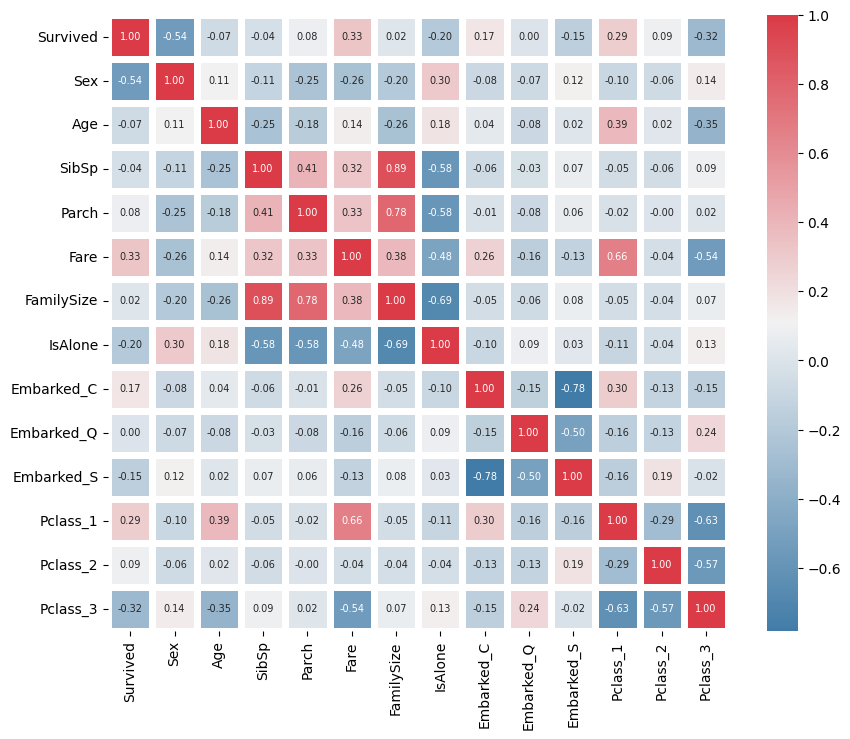

In [55]:
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(240,10,n=9, as_cmap=True)



plt.figure(figsize=(10,8))
sns.heatmap(
    df.corr(),
            annot=True,
            fmt=".2f",
            cmap=cmap,
            linewidths=5,
            annot_kws={"size":7}
           )

붉은 색으로 표시된 부분은 양의 상관관계로 한 변수가 증가하면 다른 변수도 증가하는 것을 말합니다. 파란색으로 표시된 부분은 음의 상관관계로 하나가 증가하면 다른 하나는 감소하는 상관관계를 말합니다. 1이나 -1에 가까울 수록 강한 상관관계이고, 0에 가까울 수록 상관관계가 없습니다.

Survived 컬럼과 0.2 이상의 양의 상관관계를 갖는 컬럼은 Fare, Pclass_1이 있습니다. 이 말은 즉, 돈을 많이 지불할 수록, 1등석 승객일 수록 생존할 가능성이 높다는 것을 의미합니다.

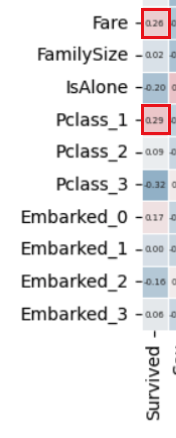

다음으로 Survived 컬럼과 0.2 이상의 음의 상관관계를 갖는 컬럼은 Sex, IsAlone, Pclass_3 컬럼이 있습니다. 해석을 해보자면 여성일 수록 (Sex=0), 혼자 탈 수록 (IsAlone=0), 3등석에 타지 않았을 수록 (Pclass_3=0) 생존율이 높다는 의미입니다. 흥미롭게도 Parch, SibSp 컬럼은 상관관계가 낮게 잡히는데 파생 변수로 추가한 IsAlone이 높은 상관관계를 보여줍니다.

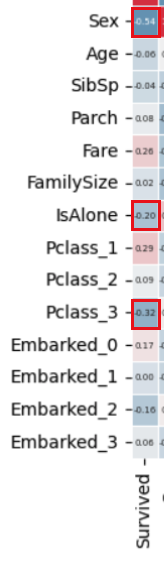

상관관계 시각화를 통해서 생존과 관련된 인사이트를 알 수 있었습니다. 먼저 성별이 중요했고, 운임을 많이 지불할 수록, 1등칸에 탈 수록 생존율이 높았습니다. 그리고 가족 없이 혼자서 탑승할 수록 생존율이 높았습니다.  

생존 여부와 관련 없는 다른 데이터들 간의 상관관계도 확인할 수 있습니다.

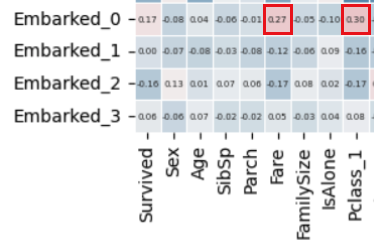

승선지와 운임, 1등칸 탑승 여부가 높은 양의 상관관계를 보여주었습니다. 이는 첫번째 승선지에서 돈이 많은 승객들이 많이 탑승했다고 해석할 수 있습니다.

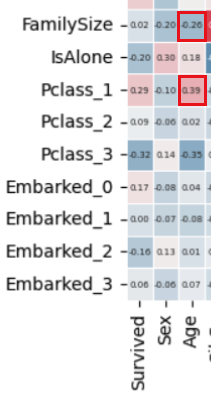

나이와 1등석 탑승여부는 뚜렸한 상관관계를 보여주었습니다. 확실히 연장자가 1등석에 많이 탑승했음을 알 수 있습니다. 그리고 Family Size와는 음의 상관관계를 보여주는데, 나이가 많을 수록 혼자 탑승한 승객이 많다는 걸 알 수 있습니다.

이렇듯 컬럼들 간의 선형적인 상관관계를 시각화한 것 만으로도 데이터로부터 수많은 인사이트를 얻을 수 있습니다. 그리고 이를 가능케 하려면 전처리 작업이 필수적입니다.

## 연습문제
상관관계 시각화 행렬을 보고, 앞서 언급되진 않았지만 흥미로운 상관관계들을 찾아보세요.

## 정리
이번 챕터에서는 전처리 된 데이터를 가지고 컬럼들 간의 선형적인 상관관계를 분석해보았습니다. 그리고 상관관계를 해석해보았습니다. 다음 챕터에서는 생존률 예측 모델을 한번 만들어보겠습니다.